In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.ion()

Define the right hand side of the equation.
$y$ can be a vector, $t$ is what we derive by, the rest are arbitrary parameters.

In [2]:
def dydt(y, t, a, k):
    return a - k*y

Initial conditions on $y$

In [3]:
init = 0

Integrate from 0 to 47

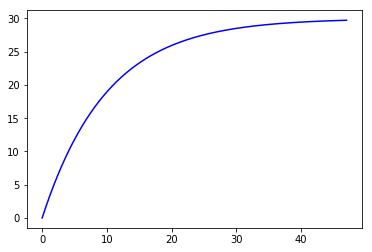

In [4]:
t = np.linspace(0,47,1000)
sol=odeint(dydt, init, t, args=(3, 0.1))
plt.plot(t, sol[:,0], color='b')